Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

Data Description:
Murder -- Muder rates in different places of United States
Assualt- Assualt rate in different places of United States
UrbanPop - urban population in different places of United States
Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("crime_data.csv")
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data.rename(columns={"Unnamed: 0":"states"},  inplace=True)
data.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   states    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
d1=data.iloc[:,1:]
d1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [7]:
d1.columns

Index(['Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(d1)
scaled_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

# K-MEANS

In [10]:
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters=2)

In [12]:
model.fit(scaled_data)

KMeans(n_clusters=2)

In [13]:
#the wcss value for the model
model.inertia_

104.96163315756871

In [14]:
wcss=[]
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(scaled_data)
    wcss.append(model.inertia_)

In [15]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 49.96920284452793,
 44.229271777238004,
 39.41669584451695,
 36.25324398856997,
 31.212215162783384,
 28.362812710115282]

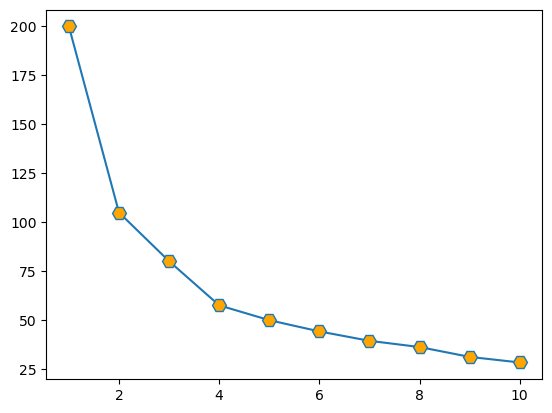

In [16]:
### Elbow Plot
plt.plot(range(1,11),wcss, marker='H', markersize=10, markerfacecolor='orange')
plt.show()

In [17]:
final_model = KMeans(n_clusters=3)

In [18]:
final_model.fit(scaled_data)

KMeans(n_clusters=3)

In [19]:
final_model.labels_

array([1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 2, 2, 1, 0, 1, 2, 1,
       0, 1, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 1, 0, 1, 1, 2,
       0, 2, 2, 0, 0, 2])

In [20]:
d1['Label'] = final_model.labels_

In [21]:
d1

,Murder,Assault,UrbanPop,Rape,Label
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1
5,7.9,204,78,38.7,1
6,3.3,110,77,11.1,2
7,5.9,238,72,15.8,2
8,15.4,335,80,31.9,1
9,17.4,211,60,25.8,1


In [22]:
grp = d1.groupby('Label')

In [23]:
for x,y in grp:
    print(y)
    print('_'*70)

    Murder  Assault  UrbanPop  Rape  Label
11     2.6      120        54  14.2      0
14     2.2       56        57  11.3      0
18     2.1       83        51   7.8      0
22     2.7       72        66  14.9      0
25     6.0      109        53  16.4      0
28     2.1       57        56   9.5      0
33     0.8       45        44   7.3      0
40     3.8       86        45  12.8      0
44     2.2       48        32  11.2      0
47     5.7       81        39   9.3      0
48     2.6       53        66  10.8      0
______________________________________________________________________
    Murder  Assault  UrbanPop  Rape  Label
0     13.2      236        58  21.2      1
1     10.0      263        48  44.5      1
2      8.1      294        80  31.0      1
4      9.0      276        91  40.6      1
5      7.9      204        78  38.7      1
8     15.4      335        80  31.9      1
9     17.4      211        60  25.8      1
12    10.4      249        83  24.0      1
17    15.4      249       

In [24]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape
Label,,,,
0,2.981818,73.636364,51.181818,11.409091
1,12.165000,255.250000,68.400000,29.165000
2,5.963158,138.052632,70.842105,18.568421


# Hirarichal agg_clustering

In [25]:
d1.head()

,Murder,Assault,UrbanPop,Rape,Label
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,1


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(d1)

In [28]:
from sklearn.cluster import AgglomerativeClustering

In [29]:
model=AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='complete')

In [30]:
model.fit(scaled_data)

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [31]:
model.labels_

array([0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2,
       1, 2, 2, 1, 1, 2], dtype=int64)

In [32]:
d1['Labels']=model.labels_

In [33]:
d1.head()

,Murder,Assault,UrbanPop,Rape,Label,Labels
0,13.2,236,58,21.2,1,0
1,10.0,263,48,44.5,1,0
2,8.1,294,80,31.0,1,0
3,8.8,190,50,19.5,2,2
4,9.0,276,91,40.6,1,0


In [34]:
grp=d1.groupby('Labels')

In [35]:
for x,y in grp:
    print(y)
    print('_'*70)

    Murder  Assault  UrbanPop  Rape  Label  Labels
0     13.2      236        58  21.2      1       0
1     10.0      263        48  44.5      1       0
2      8.1      294        80  31.0      1       0
4      9.0      276        91  40.6      1       0
5      7.9      204        78  38.7      1       0
8     15.4      335        80  31.9      1       0
9     17.4      211        60  25.8      1       0
12    10.4      249        83  24.0      1       0
17    15.4      249        66  22.2      1       0
19    11.3      300        67  27.8      1       0
21    12.1      255        74  35.1      1       0
23    16.1      259        44  17.1      1       0
24     9.0      178        70  28.2      1       0
27    12.2      252        81  46.0      1       0
30    11.4      285        70  32.1      1       0
31    11.1      254        86  26.1      1       0
32    13.0      337        45  16.1      1       0
39    14.4      279        48  22.5      1       0
41    13.2      188        59  

In [36]:
grp.agg('mean')

,Murder,Assault,UrbanPop,Rape,Label
Labels,,,,,
0,12.165000,255.250000,68.400000,29.165000,1.0
1,2.981818,73.636364,51.181818,11.409091,0.0
2,5.963158,138.052632,70.842105,18.568421,2.0


In [37]:
from scipy.cluster import hierarchy

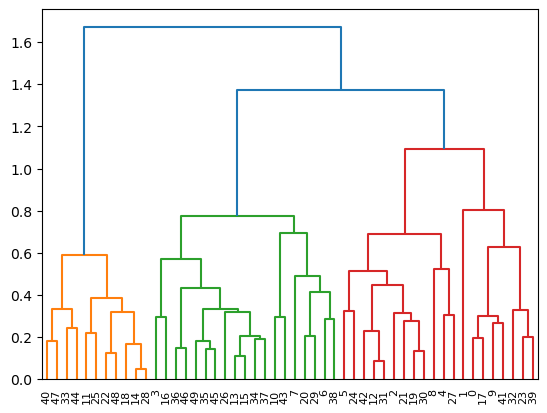

In [38]:
hr=hierarchy.linkage(scaled_data,method='complete')
dn=hierarchy.dendrogram(hr)

# DBSCAN

In [39]:
data.head()

,states,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [40]:
data.drop(['states'],axis=1,inplace=True)


In [41]:
data.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [58]:
array=data.values
array

array([[ 13.2, 236. ,  58. ,  21.2,  -1. ],
       [ 10. , 263. ,  48. ,  44.5,  -1. ],
       [  8.1, 294. ,  80. ,  31. ,  -1. ],
       [  8.8, 190. ,  50. ,  19.5,  -1. ],
       [  9. , 276. ,  91. ,  40.6,  -1. ],
       [  7.9, 204. ,  78. ,  38.7,  -1. ],
       [  3.3, 110. ,  77. ,  11.1,  -1. ],
       [  5.9, 238. ,  72. ,  15.8,  -1. ],
       [ 15.4, 335. ,  80. ,  31.9,  -1. ],
       [ 17.4, 211. ,  60. ,  25.8,  -1. ],
       [  5.3,  46. ,  83. ,  20.2,  -1. ],
       [  2.6, 120. ,  54. ,  14.2,  -1. ],
       [ 10.4, 249. ,  83. ,  24. ,  -1. ],
       [  7.2, 113. ,  65. ,  21. ,  -1. ],
       [  2.2,  56. ,  57. ,  11.3,  -1. ],
       [  6. , 115. ,  66. ,  18. ,  -1. ],
       [  9.7, 109. ,  52. ,  16.3,  -1. ],
       [ 15.4, 249. ,  66. ,  22.2,  -1. ],
       [  2.1,  83. ,  51. ,   7.8,  -1. ],
       [ 11.3, 300. ,  67. ,  27.8,  -1. ],
       [  4.4, 149. ,  85. ,  16.3,  -1. ],
       [ 12.1, 255. ,  74. ,  35.1,  -1. ],
       [  2.7,  72. ,  66. ,  14

In [60]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(array)
#scaled_data

In [61]:
from sklearn.cluster import DBSCAN

In [65]:
model = DBSCAN(min_samples=5, eps=1.3)

In [70]:
clusters=model.fit_predict(scaled_data)

In [71]:
model.labels_

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [73]:
set(clusters)


{-1, 0}

In [76]:
data['cluster']=model.labels_
data

,Murder,Assault,UrbanPop,Rape,Label,cluster
0,13.2,236,58,21.2,0,0
1,10.0,263,48,44.5,-1,-1
2,8.1,294,80,31.0,0,0
3,8.8,190,50,19.5,0,0
4,9.0,276,91,40.6,-1,-1
5,7.9,204,78,38.7,0,0
6,3.3,110,77,11.1,0,0
7,5.9,238,72,15.8,0,0
8,15.4,335,80,31.9,-1,-1
9,17.4,211,60,25.8,0,0


In [77]:
from sklearn import cluster
data[data['cluster']==-1]

,Murder,Assault,UrbanPop,Rape,Label,cluster
1,10.0,263,48,44.5,-1,-1
4,9.0,276,91,40.6,-1,-1
8,15.4,335,80,31.9,-1,-1
32,13.0,337,45,16.1,-1,-1


In [78]:
from sklearn.metrics import silhouette_score
score=silhouette_score(scaled_data,model.labels_,metric='euclidean')
score

0.23290181596058246